# Learning curves - Predicting flight delays 
### *Does model performance scales with datasetsize?*



The objective of this test is to evaluate whether we have enough data to achieve a sufficient estimate of model performance, or even, if we need all the 5 million training samples. 
This test will be performed by ploting the learning curves of a Random Forest model's performance (without tuning) as a function of the *train_bin_airport* training set size (cleaned training set with all outliers and some feature selection). RMSE will be used as scoring.

----

train_bin_airport features:             
'ARR_DELAY_NEW' (target),                 
'DEP_DELAY_NEW',                 
'MONTH',                     
'DAY_OF_MONTH',                
'DAY_OF_WEEK',                   
'OP_CARRIER' (dummy variable),                  
'AIRP_ORIGIN' (dummy variable binned),               
'AIRP_DEST' (dummy variable binned),               
'HOUR_SCHEDULED_DEP',                    
'HOUR_SCHEDULED_ARR',                    
'CRS_ELAPSED_TIME',                    
'DISTANCE'                          

---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
train_bin_airport = pd.read_csv('train_bin_airport.csv')
test_bin_airport = pd.read_csv('test_bin_airport.csv')
target_bin_airport = pd.read_csv('target_bin_airport.csv')

train_bin_airport.shape, test_bin_airport.shape, target_bin_airport.shape

((5113042, 36), (1704348, 36), (5113042, 1))

In [3]:
X_train = train_bin_airport.copy()
y_train = target_bin_airport['ARR_DELAY_NEW'].copy()

X_train.shape, y_train.shape

((5113042, 36), (5113042,))

In [19]:
def plot_learning_curve(regressor, title, X_train, y_train, cv=None, score=None, n_jobs=None,
                        train_sizes=np.linspace(0.001, 1.0, 10)):

    train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=cv, scoring=score, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_rmse = np.sqrt(-train_scores)
    train_scores_mean = np.mean(train_scores_rmse, axis=1)
    train_scores_std = np.std(train_scores_rmse, axis=1)
        
    test_scores_rmse = np.sqrt(-test_scores)
    test_scores_mean = np.mean(test_scores_rmse, axis=1)
    test_scores_std = np.std(test_scores_rmse, axis=1)
    
        
    plt.figure(figsize=(8,5))
    plt.title(title)
    plt.xlabel("Training examples/size")
    plt.ylabel("RMSE")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation set")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Lu\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

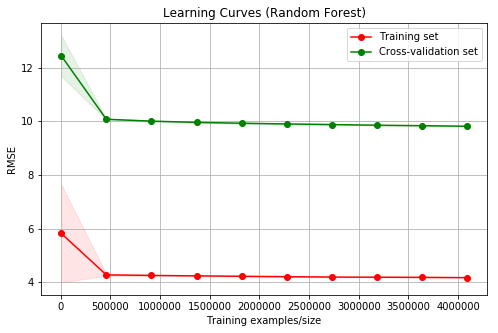

In [20]:
# Cross validation with 10 iterations to get mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=87)
title = "Learning Curves (Random Forest)"

regressor = RandomForestRegressor()
plot_learning_curve(regressor, title, X_train, y_train, cv=cv, score='neg_mean_squared_error', n_jobs=4)